In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.linear_model
import sklearn.datasets
import sklearn.inspection
import scipy.special
import numpy
import seaborn
import matplotlib.pyplot as plt

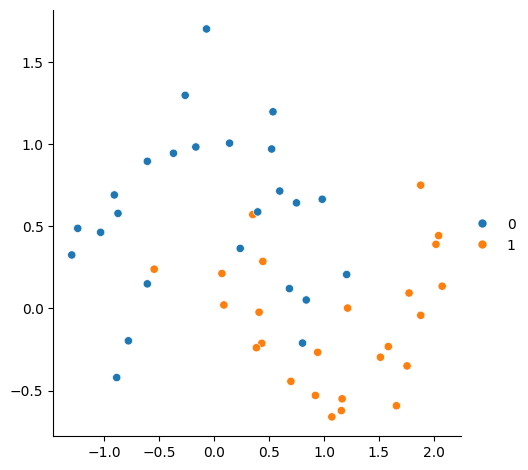

In [2]:
# Create a random dataset with two blobs
x, y = sklearn.datasets.make_moons(n_samples = 50, noise = 0.25, random_state = 42)
seaborn.relplot(x = x[:, 0], y = x[:, 1], hue = y)

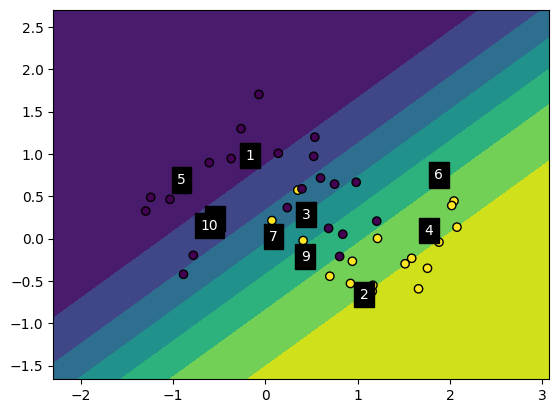

In [3]:
# Logistic Regression
lr = sklearn.linear_model.LogisticRegression()
lr.fit(x, y)
plot = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(lr, x, response_method = "predict_proba")
plot.ax_.scatter(x[:, 0], x[:, 1], c = y, edgecolor = "black")
for i in range(10):
    plot.ax_.text(x[i, 0], x[i, 1], str(i + 1), backgroundcolor = "black", color = "white", ha = "center", va = "center")

In [4]:
# Output the probability predictions
lr.predict_proba(x[0:10])

array([[0.89446916, 0.10553084],
       [0.10044569, 0.89955431],
       [0.54765317, 0.45234683],
       [0.13455494, 0.86544506],
       [0.93221762, 0.06778238],
       [0.28619664, 0.71380336],
       [0.55352796, 0.44647204],
       [0.80242794, 0.19757206],
       [0.34959954, 0.65040046],
       [0.79166657, 0.20833343]])

In [5]:
# Use matrix operations to get the same predictions
p1 = 1 / (1 + numpy.exp(- (x[0:10] @ numpy.transpose(lr.coef_) + lr.intercept_)))
numpy.hstack([1 - p1, p1])

array([[0.89446916, 0.10553084],
       [0.10044569, 0.89955431],
       [0.54765317, 0.45234683],
       [0.13455494, 0.86544506],
       [0.93221762, 0.06778238],
       [0.28619664, 0.71380336],
       [0.55352796, 0.44647204],
       [0.80242794, 0.19757206],
       [0.34959954, 0.65040046],
       [0.79166657, 0.20833343]])

In [6]:
# Use matrix operations to get the same predictions, again
p1 = scipy.special.expit(x[0:10] @ numpy.transpose(lr.coef_) + lr.intercept_)
numpy.hstack([1 - p1, p1])

array([[0.89446916, 0.10553084],
       [0.10044569, 0.89955431],
       [0.54765317, 0.45234683],
       [0.13455494, 0.86544506],
       [0.93221762, 0.06778238],
       [0.28619664, 0.71380336],
       [0.55352796, 0.44647204],
       [0.80242794, 0.19757206],
       [0.34959954, 0.65040046],
       [0.79166657, 0.20833343]])

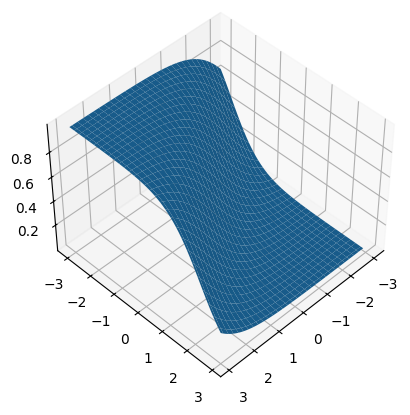

In [7]:
# Plot the surface
X, Y = numpy.meshgrid(numpy.arange(-3, 3, 0.1), numpy.arange(-3, 3, 0.1))
Z = scipy.special.expit(X * lr.coef_[0, 0] + Y * lr.coef_[0, 1] + lr.intercept_)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(X, Y, Z)
ax.view_init(45, 45)